In [1]:
!pip install opencv-python
!pip install opencv-python-headless

     |████████████████████████████████| 60.9 MB 232 kB/s  eta 0:00:01      | 21.9 MB 11.4 MB/s eta 0:00:04
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
     |████████████████████████████████| 48.3 MB 193 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd
from keras.applications.vgg16 import VGG16 as vgg16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from math import floor
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from numpy import expand_dims, array, exp, max
import json
import csv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50 as resnet50
from tensorflow.keras.applications.inception_v3 import InceptionV3 as inception
from tensorflow.keras.applications.densenet import DenseNet121 as densenet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 as mobilenetv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,GlobalAveragePooling2D,Flatten
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib
import matplotlib.pyplot as plt
import os
import scipy
from scipy import ndimage
import imageio
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import random

In [3]:
# set the model hyper parameters
BATCH_SIZE = 8
# set the image size to fit the resnet model for lower overfitting
IMG_SIZE = (224, 224)

In [4]:
train_df = pd.read_csv("files/densenet121/crx8/lbp_results/crx8_lbp_above.csv")
train_df2 = pd.read_csv("files/densenet121/crx8/lbp_results/crx8_lbp_below.csv")

train_df3 = pd.read_csv("files/densenet121/crx8/glcm_results/crx8_correlation_above_glcm_above.csv")
train_df4 = pd.read_csv("files/densenet121/crx8/glcm_results/crx8_correlation_above_glcm_below.csv")

train_df5 = pd.read_csv("files/densenet121/crx8/glcm_results/crx8_energy_above_glcm_above.csv")
train_df6 = pd.read_csv("files/densenet121/crx8/glcm_results/crx8_energy_above_glcm_below.csv")

train_df7 = pd.read_csv("files/densenet121/crx8/glcm_results/crx8_homogeneity_above_glcm_above.csv")
train_df8 = pd.read_csv("files/densenet121/crx8/glcm_results/crx8_homogeneity_above_glcm_below.csv")

In [5]:
print(train_df2)

                      file label
0    five/00009260_000.png  five
1    five/00009237_023.png  five
2    five/00009237_024.png  five
3    five/00009286_000.png  five
4    five/00009336_003.png  five
..                     ...   ...
364   six/00011584_003.png   six
365   six/00011583_000.png   six
366   six/00011598_027.png   six
367   six/00011671_000.png   six
368   six/00011640_000.png   six

[369 rows x 2 columns]


In [6]:
train_dataset_gen = ImageDataGenerator(rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.15, 
        brightness_range=[0.7, 1.4],
        vertical_flip=True,  
        horizontal_flip=True,
        rotation_range=15, 
        
        
        width_shift_range=0.1, 
        height_shift_range=0.1,
        validation_split=0.2,
        fill_mode='nearest')

In [7]:
training_dataset = train_dataset_gen.flow_from_dataframe(dataframe=train_df,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset2 = train_dataset_gen.flow_from_dataframe(dataframe=train_df2,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")
training_dataset3 = train_dataset_gen.flow_from_dataframe(dataframe=train_df3,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset4 = train_dataset_gen.flow_from_dataframe(dataframe=train_df4,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")
training_dataset5 = train_dataset_gen.flow_from_dataframe(dataframe=train_df5,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset6 = train_dataset_gen.flow_from_dataframe(dataframe=train_df6,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")
training_dataset7 = train_dataset_gen.flow_from_dataframe(dataframe=train_df7,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

training_dataset8 = train_dataset_gen.flow_from_dataframe(dataframe=train_df8,
                                                         directory="crx8",
                                                         shuffle=True,
                                                         x_col="file",
                                                         y_col="label",
                                                         batch_size=BATCH_SIZE,
                                                         target_size=IMG_SIZE,
                                                         validate_filenames=False,
                                                         class_mode="categorical",
                                                         subset="training")

Found 1305 non-validated image filenames belonging to 4 classes.
Found 296 non-validated image filenames belonging to 4 classes.
Found 817 non-validated image filenames belonging to 4 classes.
Found 784 non-validated image filenames belonging to 4 classes.
Found 847 non-validated image filenames belonging to 4 classes.
Found 754 non-validated image filenames belonging to 4 classes.
Found 780 non-validated image filenames belonging to 4 classes.
Found 821 non-validated image filenames belonging to 4 classes.


In [8]:
model_name = densenet
input_t =(224, 224, 3)
#model = tf.keras.applications.DenseNet169(weights = 'imagenet', include_top = False, input_shape = input_t)

model_t = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)

model_t2 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)
model_t3 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)
model_t4 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)
model_t5 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)
model_t6 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)
model_t7 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)
model_t8 = model_name(include_top=False,
                   weights="imagenet",
                   input_shape = input_t)

29089792/29084464 [==============================] - 0s 0us/step


In [9]:
model_t.trainable = False
model_t2.trainable = False
model_t3.trainable = False
model_t4.trainable = False
model_t5.trainable = False
model_t6.trainable = False
model_t7.trainable = False
model_t8.trainable = False

In [10]:
#finetune by removeing the last layer
#for layer in model_t.layers[:-2]:
    #layer.trainable = False

In [11]:
#model classifier topup
#reg=0.001

model = Sequential()
model.add(model_t)
model.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, activation='softmax'))


model2 = Sequential()
model2.add(model_t2)
model2.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(4, activation='softmax'))

model3 = Sequential()
model3.add(model_t3)
model3.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.5))

model3.add(layers.Dense(4, activation='softmax'))

model4 = Sequential()
model4.add(model_t4)
model4.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.5))

model4.add(layers.Dense(4, activation='softmax'))

model5 = Sequential()
model5.add(model_t5)
model5.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.5))

model5.add(layers.Dense(4, activation='softmax'))

model6 = Sequential()
model6.add(model_t6)
model6.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model6.add(layers.Dense(64, activation='relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.5))

model6.add(layers.Dense(4, activation='softmax'))

model7 = Sequential()
model7.add(model_t7)
model7.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model7.add(layers.Dense(64, activation='relu'))
model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.5))

model7.add(layers.Dense(4, activation='softmax'))

model8 = Sequential()
model8.add(model_t8)
model8.add(Flatten())
#model.add(layers.BatchNormalization())
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.L2(reg)))
model8.add(layers.Dense(64, activation='relu'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dropout(0.5))

model8.add(layers.Dense(4, activation='softmax'))

In [12]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [18]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history = model.fit(training_dataset, batch_size=4, shuffle=True, epochs=100, verbose=1)

model2.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history2 = model2.fit(training_dataset2, batch_size=4, shuffle=True, epochs=100, verbose=1)

model3.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history3 = model3.fit(training_dataset3, batch_size=4, shuffle=True, epochs=100, verbose=1)

model4.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history4 = model4.fit(training_dataset4, batch_size=4, shuffle=True, epochs=100, verbose=1)

model5.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history5 = model5.fit(training_dataset5, batch_size=4, shuffle=True, epochs=100, verbose=1)

model6.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history6 = model6.fit(training_dataset6, batch_size=4, shuffle=True, epochs=100, verbose=1)



Epoch 1/100
164/164 [==============================] - 93s 488ms/step - loss: 1.7932 - accuracy: 0.3293 - precision: 0.3227 - recall: 0.2276
Epoch 2/100
164/164 [==============================] - 38s 233ms/step - loss: 1.4559 - accuracy: 0.4224 - precision: 0.4491 - recall: 0.3029
Epoch 3/100
164/164 [==============================] - 39s 236ms/step - loss: 1.2370 - accuracy: 0.5049 - precision: 0.5650 - recall: 0.3826
Epoch 4/100
164/164 [==============================] - 38s 233ms/step - loss: 1.2498 - accuracy: 0.5252 - precision: 0.5737 - recall: 0.3913
Epoch 5/100
164/164 [==============================] - 39s 237ms/step - loss: 1.2010 - accuracy: 0.5256 - precision: 0.5787 - recall: 0.4264
Epoch 6/100
164/164 [==============================] - 38s 234ms/step - loss: 1.1919 - accuracy: 0.5436 - precision: 0.6091 - recall: 0.4317
Epoch 7/100
164/164 [==============================] - 38s 233ms/step - loss: 1.0908 - accuracy: 0.5632 - precision: 0.6356 - recall: 0.4579
Epoch 8/100
1

37/37 [==============================] - 9s 236ms/step - loss: 0.9252 - accuracy: 0.6497 - precision: 0.6993 - recall: 0.5799
Epoch 17/100
37/37 [==============================] - 9s 237ms/step - loss: 0.9421 - accuracy: 0.6561 - precision: 0.7311 - recall: 0.5918
Epoch 18/100
37/37 [==============================] - 9s 238ms/step - loss: 0.9327 - accuracy: 0.6245 - precision: 0.7268 - recall: 0.5469
Epoch 19/100
37/37 [==============================] - 9s 241ms/step - loss: 0.9073 - accuracy: 0.6512 - precision: 0.7274 - recall: 0.5843
Epoch 20/100
37/37 [==============================] - 9s 235ms/step - loss: 0.9117 - accuracy: 0.6579 - precision: 0.7270 - recall: 0.5829
Epoch 21/100
37/37 [==============================] - 9s 242ms/step - loss: 0.9219 - accuracy: 0.6668 - precision: 0.7615 - recall: 0.5909
Epoch 22/100
37/37 [==============================] - 9s 239ms/step - loss: 0.9695 - accuracy: 0.6551 - precision: 0.7190 - recall: 0.5682
Epoch 23/100
37/37 [====================

37/37 [==============================] - 9s 242ms/step - loss: 0.6482 - accuracy: 0.7066 - precision: 0.8418 - recall: 0.6532
Epoch 76/100
37/37 [==============================] - 9s 237ms/step - loss: 0.7807 - accuracy: 0.6859 - precision: 0.7356 - recall: 0.6492
Epoch 77/100
37/37 [==============================] - 9s 243ms/step - loss: 0.6118 - accuracy: 0.7861 - precision: 0.8511 - recall: 0.7414
Epoch 78/100
37/37 [==============================] - 9s 240ms/step - loss: 0.7181 - accuracy: 0.7303 - precision: 0.7727 - recall: 0.6941
Epoch 79/100
37/37 [==============================] - 9s 236ms/step - loss: 0.6455 - accuracy: 0.7487 - precision: 0.7969 - recall: 0.6738
Epoch 80/100
37/37 [==============================] - 9s 240ms/step - loss: 0.4857 - accuracy: 0.8563 - precision: 0.8765 - recall: 0.7870
Epoch 81/100
37/37 [==============================] - 9s 237ms/step - loss: 0.6803 - accuracy: 0.7388 - precision: 0.8047 - recall: 0.6729
Epoch 82/100
37/37 [====================

103/103 [==============================] - 24s 230ms/step - loss: 0.6171 - accuracy: 0.7539 - precision: 0.8177 - recall: 0.6995
Epoch 91/100
103/103 [==============================] - 24s 229ms/step - loss: 0.6714 - accuracy: 0.7538 - precision: 0.7914 - recall: 0.6862
Epoch 92/100
103/103 [==============================] - 24s 232ms/step - loss: 0.6689 - accuracy: 0.7285 - precision: 0.7573 - recall: 0.6723
Epoch 93/100
103/103 [==============================] - 24s 232ms/step - loss: 0.6726 - accuracy: 0.7306 - precision: 0.7514 - recall: 0.6632
Epoch 94/100
103/103 [==============================] - 24s 231ms/step - loss: 0.6411 - accuracy: 0.7622 - precision: 0.7973 - recall: 0.6995
Epoch 95/100
103/103 [==============================] - 24s 230ms/step - loss: 0.6763 - accuracy: 0.7323 - precision: 0.7597 - recall: 0.6728
Epoch 96/100
103/103 [==============================] - 24s 235ms/step - loss: 0.6558 - accuracy: 0.7254 - precision: 0.7720 - recall: 0.6781
Epoch 97/100
103/10

106/106 [==============================] - 26s 242ms/step - loss: 1.2112 - accuracy: 0.5173 - precision: 0.6051 - recall: 0.4270
Epoch 7/100
106/106 [==============================] - 25s 238ms/step - loss: 1.1482 - accuracy: 0.5510 - precision: 0.6329 - recall: 0.4601
Epoch 8/100
106/106 [==============================] - 25s 239ms/step - loss: 1.1029 - accuracy: 0.5702 - precision: 0.6203 - recall: 0.4765
Epoch 9/100
106/106 [==============================] - 25s 240ms/step - loss: 1.1506 - accuracy: 0.5505 - precision: 0.6206 - recall: 0.4511
Epoch 10/100
106/106 [==============================] - 25s 240ms/step - loss: 1.1339 - accuracy: 0.5611 - precision: 0.6533 - recall: 0.4783
Epoch 11/100
106/106 [==============================] - 25s 238ms/step - loss: 1.0912 - accuracy: 0.5925 - precision: 0.6639 - recall: 0.4805
Epoch 12/100
106/106 [==============================] - 26s 240ms/step - loss: 1.1503 - accuracy: 0.5410 - precision: 0.6235 - recall: 0.4351
Epoch 13/100
106/106 [

95/95 [==============================] - 22s 229ms/step - loss: 0.8351 - accuracy: 0.6830 - precision: 0.7641 - recall: 0.5821
Epoch 22/100
95/95 [==============================] - 21s 225ms/step - loss: 0.9781 - accuracy: 0.6341 - precision: 0.6845 - recall: 0.5179
Epoch 23/100
95/95 [==============================] - 21s 226ms/step - loss: 0.9070 - accuracy: 0.6496 - precision: 0.7380 - recall: 0.5429
Epoch 24/100
95/95 [==============================] - 22s 228ms/step - loss: 0.8215 - accuracy: 0.6823 - precision: 0.7285 - recall: 0.5628
Epoch 25/100
95/95 [==============================] - 21s 225ms/step - loss: 0.8954 - accuracy: 0.6659 - precision: 0.7169 - recall: 0.5703
Epoch 26/100
95/95 [==============================] - 22s 227ms/step - loss: 0.9321 - accuracy: 0.6553 - precision: 0.6865 - recall: 0.5245
Epoch 27/100
95/95 [==============================] - 22s 228ms/step - loss: 0.8155 - accuracy: 0.6977 - precision: 0.7565 - recall: 0.5908
Epoch 28/100
95/95 [=============

98/98 [==============================] - 23s 236ms/step - loss: 0.8927 - accuracy: 0.6443 - precision: 0.7248 - recall: 0.5263
Epoch 38/100
98/98 [==============================] - 23s 229ms/step - loss: 1.0080 - accuracy: 0.6267 - precision: 0.6843 - recall: 0.5249
Epoch 39/100
98/98 [==============================] - 23s 229ms/step - loss: 0.8528 - accuracy: 0.6988 - precision: 0.7583 - recall: 0.5950
Epoch 40/100
98/98 [==============================] - 22s 229ms/step - loss: 0.8624 - accuracy: 0.7069 - precision: 0.7749 - recall: 0.5735
Epoch 41/100
98/98 [==============================] - 23s 232ms/step - loss: 0.9094 - accuracy: 0.6452 - precision: 0.6914 - recall: 0.5240
Epoch 42/100
98/98 [==============================] - 23s 233ms/step - loss: 0.9136 - accuracy: 0.6469 - precision: 0.7167 - recall: 0.5368
Epoch 43/100
98/98 [==============================] - 23s 231ms/step - loss: 0.8932 - accuracy: 0.6422 - precision: 0.6951 - recall: 0.5422
Epoch 44/100
98/98 [=============

KeyboardInterrupt: 

In [13]:
model7.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history7 = model7.fit(training_dataset7, batch_size=4, shuffle=True, epochs=100, verbose=1)
model8.compile(optimizer=optimizers.SGD(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy','Precision','Recall'])
history8 = model8.fit(training_dataset8, batch_size=4, shuffle=True, epochs=100, verbose=1)

Epoch 1/100
98/98 [==============================] - 59s 507ms/step - loss: 1.8034 - accuracy: 0.3459 - precision: 0.3689 - recall: 0.2837
Epoch 2/100
98/98 [==============================] - 23s 237ms/step - loss: 1.4862 - accuracy: 0.4056 - precision: 0.4487 - recall: 0.3283
Epoch 3/100
98/98 [==============================] - 23s 236ms/step - loss: 1.2420 - accuracy: 0.4943 - precision: 0.5800 - recall: 0.4174
Epoch 4/100
98/98 [==============================] - 23s 236ms/step - loss: 1.2465 - accuracy: 0.5039 - precision: 0.5668 - recall: 0.4108
Epoch 5/100
98/98 [==============================] - 23s 239ms/step - loss: 1.2185 - accuracy: 0.5057 - precision: 0.5768 - recall: 0.4171
Epoch 6/100
98/98 [==============================] - 23s 237ms/step - loss: 1.1474 - accuracy: 0.5561 - precision: 0.6101 - recall: 0.4661
Epoch 7/100
98/98 [==============================] - 23s 237ms/step - loss: 1.3927 - accuracy: 0.4660 - precision: 0.5522 - recall: 0.3860
Epoch 8/100
98/98 [========

98/98 [==============================] - 23s 239ms/step - loss: 0.8004 - accuracy: 0.6751 - precision: 0.7469 - recall: 0.5913
Epoch 60/100
98/98 [==============================] - 23s 236ms/step - loss: 0.7869 - accuracy: 0.7003 - precision: 0.7829 - recall: 0.6115
Epoch 61/100
98/98 [==============================] - 23s 237ms/step - loss: 0.7317 - accuracy: 0.7243 - precision: 0.7984 - recall: 0.6323
Epoch 62/100
98/98 [==============================] - 23s 238ms/step - loss: 0.8417 - accuracy: 0.6820 - precision: 0.7336 - recall: 0.5893
Epoch 63/100
98/98 [==============================] - 23s 236ms/step - loss: 0.8878 - accuracy: 0.6531 - precision: 0.7141 - recall: 0.5527
Epoch 64/100
98/98 [==============================] - 23s 236ms/step - loss: 0.8226 - accuracy: 0.6919 - precision: 0.7584 - recall: 0.5606
Epoch 65/100
98/98 [==============================] - 23s 233ms/step - loss: 0.7731 - accuracy: 0.7192 - precision: 0.7681 - recall: 0.6438
Epoch 66/100
98/98 [=============

103/103 [==============================] - 24s 236ms/step - loss: 0.9540 - accuracy: 0.6508 - precision: 0.7092 - recall: 0.5361
Epoch 18/100
103/103 [==============================] - 24s 233ms/step - loss: 0.8800 - accuracy: 0.6748 - precision: 0.7561 - recall: 0.5791
Epoch 19/100
103/103 [==============================] - 24s 234ms/step - loss: 0.9644 - accuracy: 0.6559 - precision: 0.7045 - recall: 0.5348
Epoch 20/100
103/103 [==============================] - 24s 236ms/step - loss: 0.8913 - accuracy: 0.6419 - precision: 0.7080 - recall: 0.5413
Epoch 21/100
103/103 [==============================] - 24s 233ms/step - loss: 0.8945 - accuracy: 0.6398 - precision: 0.7109 - recall: 0.5282
Epoch 22/100
103/103 [==============================] - 24s 233ms/step - loss: 0.8764 - accuracy: 0.6843 - precision: 0.7517 - recall: 0.5647
Epoch 23/100
103/103 [==============================] - 24s 234ms/step - loss: 0.8308 - accuracy: 0.6704 - precision: 0.7537 - recall: 0.5771
Epoch 24/100
103/10

103/103 [==============================] - 24s 233ms/step - loss: 0.7137 - accuracy: 0.7433 - precision: 0.8057 - recall: 0.6602
Epoch 75/100
103/103 [==============================] - 24s 234ms/step - loss: 0.8101 - accuracy: 0.7000 - precision: 0.7457 - recall: 0.6107
Epoch 76/100
103/103 [==============================] - 24s 234ms/step - loss: 0.7369 - accuracy: 0.7305 - precision: 0.8032 - recall: 0.6446
Epoch 77/100
103/103 [==============================] - 24s 233ms/step - loss: 0.7250 - accuracy: 0.7454 - precision: 0.7971 - recall: 0.6590
Epoch 78/100
103/103 [==============================] - 24s 232ms/step - loss: 0.7264 - accuracy: 0.7494 - precision: 0.7994 - recall: 0.6569
Epoch 79/100
103/103 [==============================] - 24s 232ms/step - loss: 0.6801 - accuracy: 0.7437 - precision: 0.8066 - recall: 0.6567
Epoch 80/100
103/103 [==============================] - 24s 233ms/step - loss: 0.7370 - accuracy: 0.7232 - precision: 0.7895 - recall: 0.6150
Epoch 81/100
103/10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


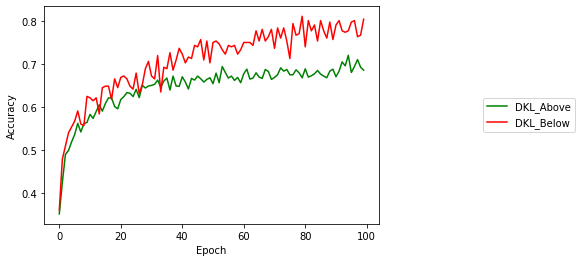

In [20]:
fig1 = plt.figure()


plt.plot(history.history['accuracy'], color='g')
plt.plot(history2.history['accuracy'], color='r')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_lbp_DKL_accuracy_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


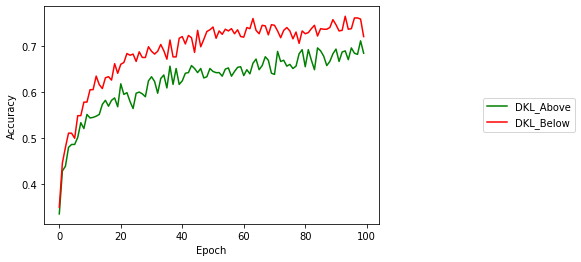

In [23]:
fig1 = plt.figure()


plt.plot(history4.history['accuracy'], color='g')
plt.plot(history3.history['accuracy'], color='r')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_correlation_DKL_accuracy_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


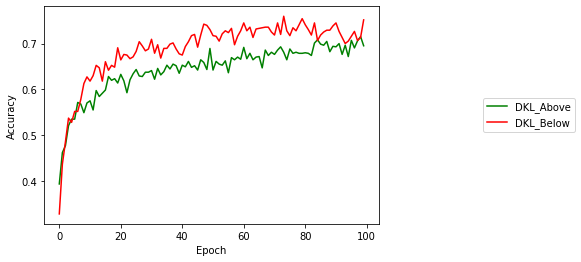

In [25]:
fig1 = plt.figure()


plt.plot(history5.history['accuracy'], color='g')
plt.plot(history6.history['accuracy'], color='r')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_energy_DKL_accuracy_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


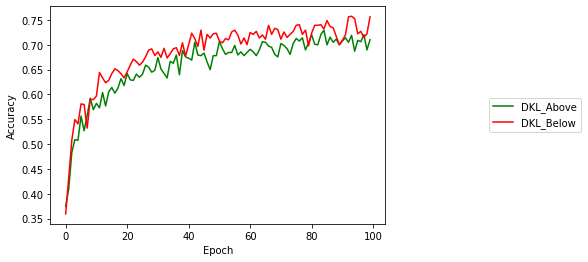

In [15]:
fig1 = plt.figure()


plt.plot(history7.history['accuracy'], color='g')
plt.plot(history8.history['accuracy'], color='r')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_homogeneity_DKL_accuracy_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


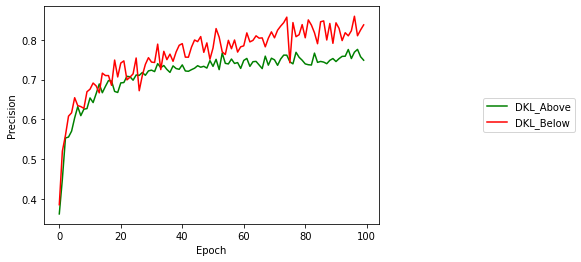

In [27]:
fig1 = plt.figure()


plt.plot(history.history['precision'], color='g')
plt.plot(history2.history['precision'], color='r')

plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_lbp_DKL_precision_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


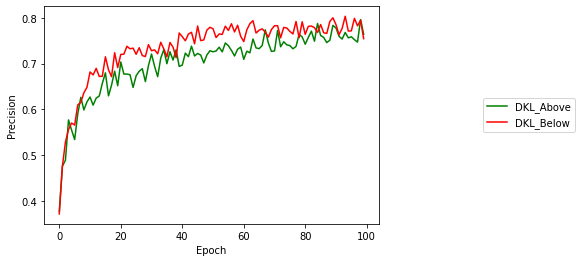

In [29]:
fig1 = plt.figure()


plt.plot(history4.history['precision'], color='g')
plt.plot(history3.history['precision'], color='r')

plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_correlation_precision_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


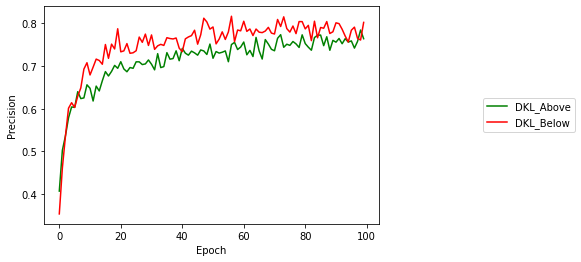

In [30]:
fig1 = plt.figure()


plt.plot(history5.history['precision'], color='g')
plt.plot(history6.history['precision'], color='r')

plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_energy_precision_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


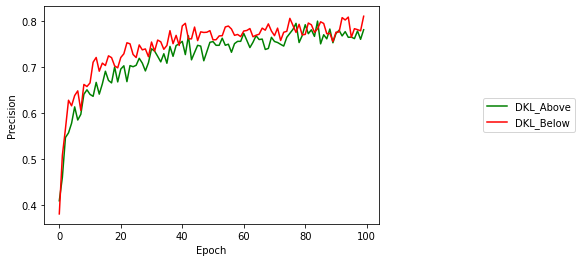

In [16]:
fig1 = plt.figure()


plt.plot(history7.history['precision'], color='g')
plt.plot(history8.history['precision'], color='r')

plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_homogeneity_precision_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


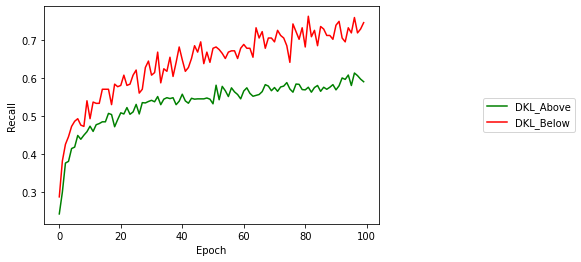

In [31]:
fig1 = plt.figure()

plt.plot(history.history['recall'], color='g')
plt.plot(history2.history['recall'], color='r')

plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_lbp_DKL_recall_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


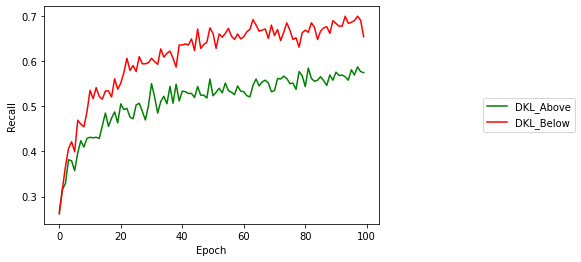

In [32]:
fig1 = plt.figure()

plt.plot(history4.history['recall'], color='g')
plt.plot(history3.history['recall'], color='r')

plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_correlation_DKL_recall_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


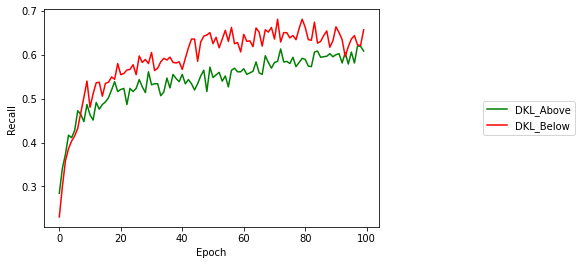

In [33]:
fig1 = plt.figure()

plt.plot(history5.history['recall'], color='g')
plt.plot(history6.history['recall'], color='r')

plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_energy_DKL_recall_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


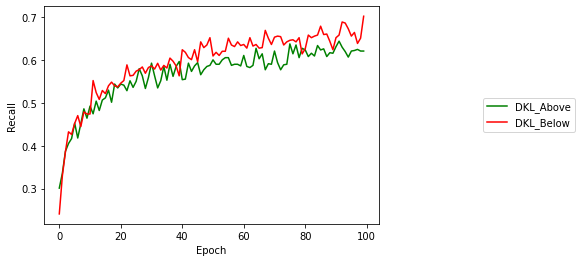

In [17]:
fig1 = plt.figure()

plt.plot(history7.history['recall'], color='g')
plt.plot(history8.history['recall'], color='r')

plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['DKL_Above','DKL_Below'], loc="center right", bbox_to_anchor=(1.6, 0.5))
fig1.savefig('densenet121_glcm_homogeneity_DKL_recall_crx8.eps',  dpi=1000, format="eps", bbox_inches="tight") 